In [2]:
import matplotlib.pyplot as plt
import book_plot as bp
from __future__ import division
%matplotlib inline

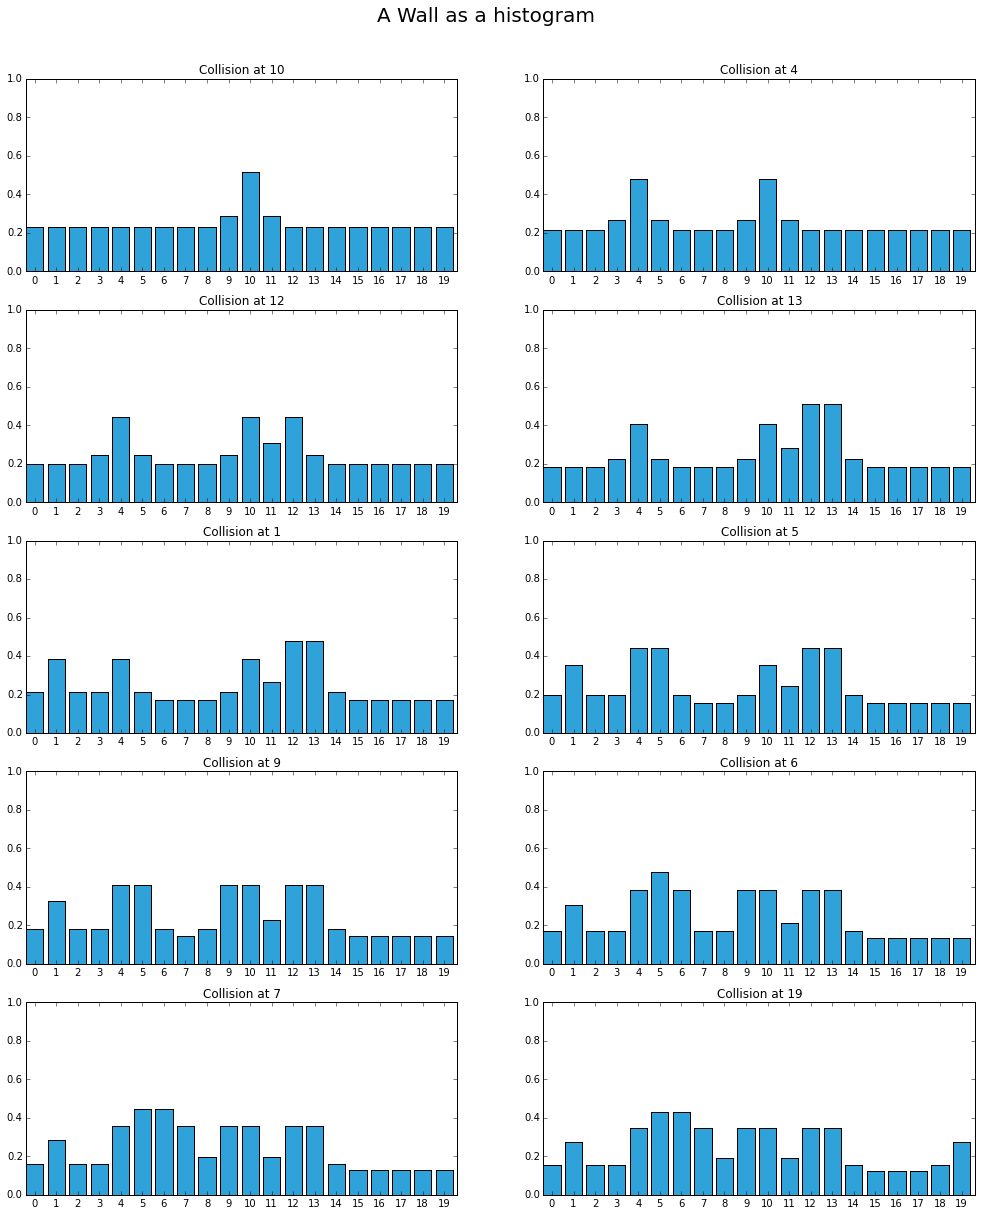

In [3]:
n=20
a=[1./n]*n
m = [ 10, 4, 12, 13, 1, 5, 9, 6, 7, 19]
plt.figure(figsize=(17,20),dpi=2540)
plt.suptitle('A Wall as a histogram',fontsize=20,y=0.95)
for j in m:
    max_a = max(a)
    for i in range(3):
        b=1.5-i*0.25
        if j-i >= 0: 
            a[j-i]*=b
        if j+i <=19:
            a[j+i]*=b
    a = [i*5/sum(a) for i in a]
    plt.subplot(len(m)/2,2,m.index(j)+1)
    bp.bar_plot(a,title='Collision at {}'.format(j))

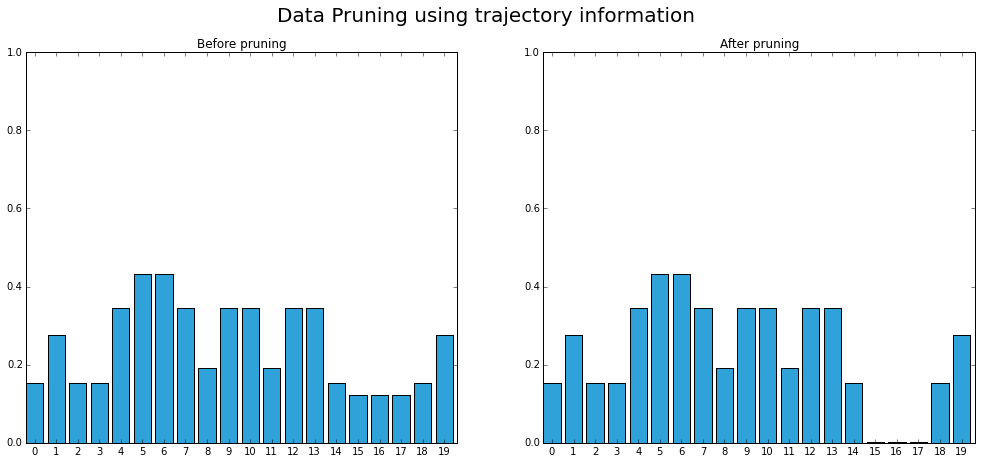

In [8]:
# Pruning of confidence from robot trajectory
plt.figure(figsize=(17,7),dpi=2540)
plt.suptitle('Data Pruning using trajectory information',fontsize=20,y=0.99)
plt.subplot(1,2,1)
bp.bar_plot(a,title='Before pruning')
a[15]=1e-3
a[16]=1e-3
a[17]=1e-3
plt.subplot(1,2,2)
bp.bar_plot(a,title='After pruning')

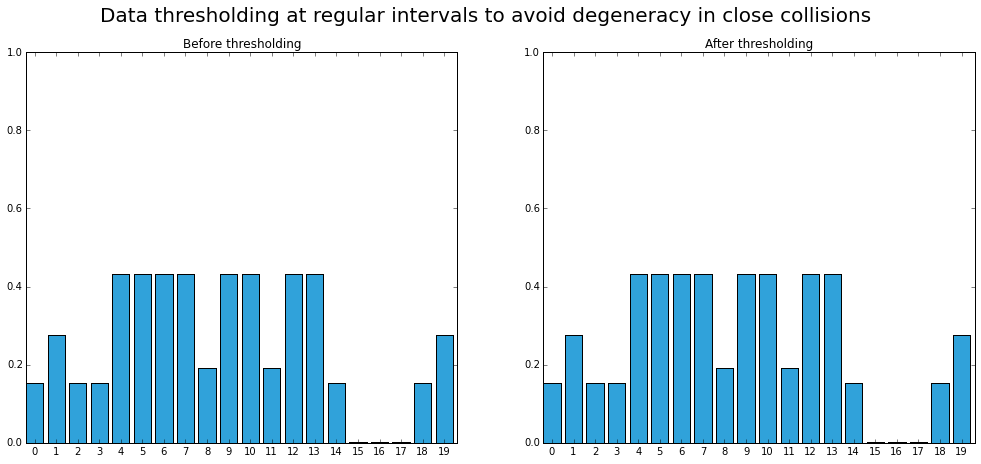

In [18]:
# Thresholding the maximum confidence
plt.figure(figsize=(17,7),dpi=2540)
plt.suptitle('Data thresholding at regular intervals to avoid degeneracy in close collisions',fontsize=20,y=0.99)
plt.subplot(1,2,1)
bp.bar_plot(a,title='Before thresholding')
for i in range(len(a)):
    if a[i]>max(a)*0.75:
        a[i]=max(a)
plt.subplot(1,2,2)
bp.bar_plot(a,title='After thresholding')

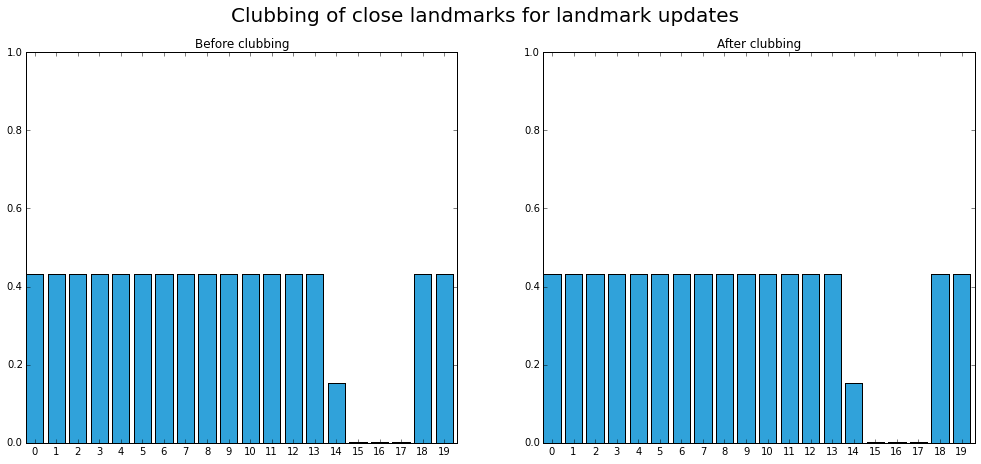

In [20]:
# Clubbing of data to form wall hypothesis for each particle
plt.figure(figsize=(17,7))
plt.suptitle('Clubbing of close landmarks for landmark updates',fontsize=20,y=0.99)
plt.subplot(1,2,1)
bp.bar_plot(a,title='Before clubbing')
t = 0.5
for i in range(len(a)):
    if a[i] == max(a):
        continue
    if i>=2 and i <=17 and (a[i-2] > max(a)*t or a[i-1] > max(a)*t) and (a[i+2] > max(a)*t or a[i+1] > max(a)*t):
        for j in range(3): # Corridor width threshold
            a[i-j]=max(a)
            a[i+j]=max(a)
    else:
        if i < 2 and max(a[j+i] for j in range(2)) < max(a)*t:
            for k in range(2):
                a[k] = 1e-3
        elif i < 2 and max(a[j+i] for j in range(2)) > max(a)*t:
            for k in range(2):
                a[k] = max(a)
        elif i > 17 and max(a[19-j] for j in range(2)) < max(a)*t:
            for k in range(2):
                a[19-k] = 1e-3
        elif i > 17 and max(a[19-j] for j in range(2)) > max(a)*t:
            for k in range(2):
                a[19-k] = max(a)
plt.subplot(1,2,2)
bp.bar_plot(a,title='After clubbing')

In [24]:
# Plotting the wall by thresholding the values in the histogram array
c=max(a)
b=1-max(a)
for i in range(len(a)):
    if a[i] > c/4:
        a[i]=a[i]+b
    a[i]=1-a[i]

# Creating the color map for plotting the wall
g=[]
for i in range(len(a)):
    g.append([a[i]]*3)

Final look of the wall in map


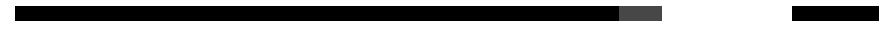

In [32]:
# Creating the wall
import matplotlib as mpl
import matplotlib.pyplot as pyplot
fig = pyplot.figure(figsize=(8,8),dpi=2540)

ax1 = fig.add_axes([0.1, 0.5, 1.5, 0.025]) # GUI rectangle creation
ax1.set_axis_off()
cmap1 = mpl.colors.ListedColormap(g)
cmap2 = mpl.cm.Greys
norm = mpl.colors.Normalize()
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap1,
                                   norm=norm,
                                   orientation='horizontal')
cb1.outline.set_visible(False)
# cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap2,
#                                    norm=norm,
#                                    orientation='vertical')
# cb1.outline.set_visible(False)
print "Final look of the wall in map"
pyplot.show()